# How to write lyrics like a pro - an Analysis of Song Lyrics
### What topics to write about for different music genres? What words to use? How long should the song lyrics be? Not sure where to begin? Below you will find the step-by-step guide to write song lyrics for different music genres.

By Yuting Gong, 2019

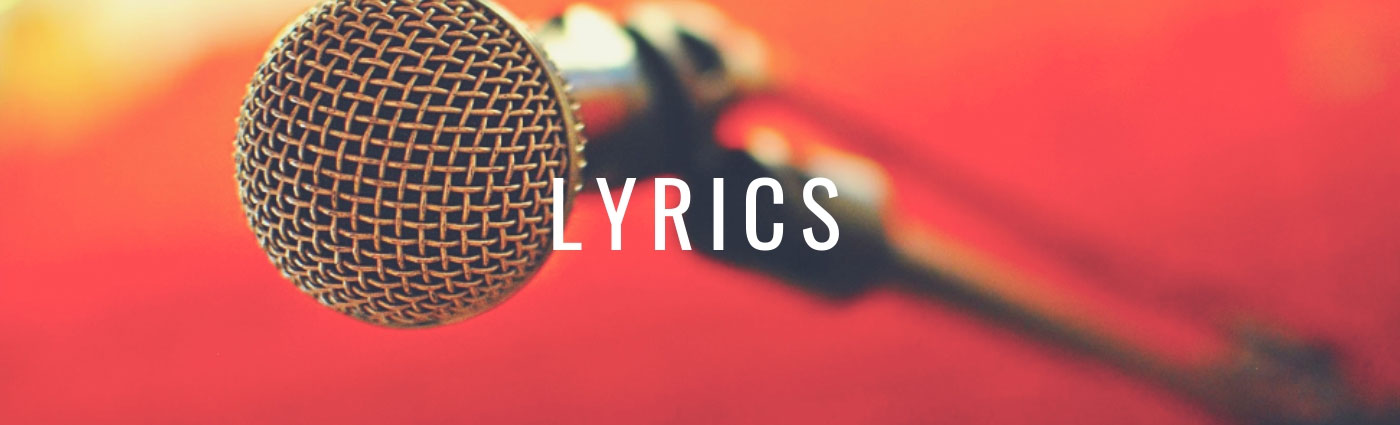

In [33]:
from IPython.display import Image
Image(filename='C:/Users/yg916/Documents/github/fall2019-proj1--yutinggong/figs/pic1.jpg')

The report is an exploratary data analysis of song lyrics aiming at understanding the characteristics and trends of lyrics for different music genres. It is a guide to teach you how to write music lyrics like a pro. 

The dataset "lyrics.csv" is a filtered corpus of 100,000+ song lyrics from MetroLyrics. Available features are song name, year, artist, genre, and lyrics. You can find the complete 380,000+ song lyrics data on Kaggle. A lyrics.RData file is also provided in the \data folder.

In [32]:
# import all packages
import pandas as pd
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#!pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from gensim.models import CoherenceModel
np.random.seed(2018)
import nltk
nltk.download('wordnet')
import matplotlib.pyplot as plt
%matplotlib inline
from gensim import corpora, models
import seaborn as sns
from gensim.test.utils import datapath

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code for all blocks, click <a href="javascript:code_toggle()">here</a>.''')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yg916\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


I first processed the raw lyrics.csv by cleaning data, removing stopwords and stemming, using Text_Processing.Rmd. The cleaned lyrics are saved under "stemmedwords" column as shown below.

In [36]:
df = pd.read_csv("C:/Users/yg916/Documents/github/fall2019-proj1--yutinggong/output/processed_lyrics.csv", index_col = 0)

In [16]:
df.head()

,song,year,artist,genre,lyrics,id,stemmedwords
1,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\nIt ...,1,stop house call home rundown grass overgrown s...
2,careless-whisper,2009,a,Hip-Hop,I feel so unsure\nAs I take your hand and lead...,2,unsure hand lead dance floor music die eyes ca...
3,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,3,mark sunday football boots pitch people gamble...
4,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\nI threw away m...,4,chris fallin fantasy threw destiny stop feelin...
5,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...,5,touch hold hand hold somethings change somethi...


## Step 1: Pick a topic

When you music is ready, meaning your music genre is set, you will start writing lyrics for it. The first step is to pick a topic for your song. A song should communicate a message, and it will be more engaging if the lyrics go with the sounds. You might be super new to lyrics writing, and do not know where to start. In this case, let's look at what artists usually write about in different music genres to give you some inspirations.

To find out the topics of different music genres, I used LDA Topic Modeling to analyze lyrics and find out the hidden topics in songs. As we have 12 music genres, I assume we have at least 12 topics, and chose the number of topics to be 12 as the input of LDA topic model. When creating the dictionary for the word corpus, I filtered words that appear less than 15 songs and more than 80% songs so that more specific and meaningful words would shine through the topic modeling.

Below are the topics I found throught the LDA Topic Modeling. Some keywords for each topic are kept in ().

In [37]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(token)
    return result

processed_docs = df.iloc[:,-1].apply(lambda x: preprocess(x))

bigram = gensim.models.Phrases(processed_docs, min_count = 10, threshold = 50) # higher threshold fewer phrases.
bigram_doc = [bigram[line] for line in processed_docs]
bigram_doc[:3] #take a look at the first document's bigram

processed_docs = bigram_doc

#create dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)

#filter tokens
# print("before filter: ", len(dictionary))
dictionary.filter_extremes(no_below=15, no_above=0.8, keep_n=100000)
# print("after filter: ", len(dictionary))

# create corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [121]:
num_topics = 12

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=2)

# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))

In [42]:
# # save a trained model to local

# # name the path
# temp_file = datapath("lyrictopics")

# # save the model
# lda_model.save(temp_file)

# Load a potentially pretrained model from disk.
# a = gensim.models.LdaModel.load(temp_file)
# a.show_topics()

In [43]:
topic_dict = {}
for num in range(num_topics):
    wp = lda_model.show_topic(num)
    topic_keywords = ", ".join([word for word, prop in wp])
    topic_dict[num] = topic_keywords    

lda_corpus = [max(prob,key=lambda y:y[1])
for prob in lda_model[bow_corpus]]

In [65]:
# topic_dict

In [122]:
topic_name = {0: "0: night (light, night, dream)", 
              1: "1: liars (run, lie, die)", 
              2: "2: time and change (time, girl, stop, change)",
             3: "3: party (dance, rock, roll, play)",
             4: "4: sweet kiss (kiss, waiting, sweet, love)",
             5: "5: baby girl & boy (baby, girl, tonight, boy)",
             6: "6: home sick (home, coming, miss, leave)",
             7: "7: world and violence (burn, sky, sun, world, life)",
             8: "8: life (life, live, time, world)",
             9: "9: money (money, boy, dog, city, car)",
             10: "10: fall for love (love, hear, hold, baby)",
             11: "11: shit yo (shit, bitch, yo, niggas)"}
for k, i in topic_name.items():
    print(i)

0: night (light, night, dream)
1: liars (run, lie, die)
2: time and change (time, girl, stop, change)
3: party (dance, rock, roll, play)
4: sweet kiss (kiss, waiting, sweet, love)
5: baby girl & boy (baby, girl, tonight, boy)
6: home sick (home, coming, miss, leave)
7: world and violence (burn, sky, sun, world, life)
8: life (life, live, time, world)
9: money (money, boy, dog, city, car)
10: fall for love (love, hear, hold, baby)
11: shit yo (shit, bitch, yo, niggas)


Then I assigned a main topic for each song and then looked at what are the topic distribution for different music genres.

In [75]:
topic = pd.DataFrame()
topic["Main Topic"] = lda_corpus
topic["Main Topic"] = topic["Main Topic"].astype(str)
new_df = topic["Main Topic"].str.split(",", n=1, expand=True)
new_df[0] = new_df[0].str[1:]
new_df[1] = new_df[1].str[:-1]
topic["Main Topic"] = pd.to_numeric(new_df[0])
topic["Probability"] = pd.to_numeric(new_df[1]).round(2)
topic["text"] = df['stemmedwords'].to_list()

df_new = pd.merge(df,topic,left_on = "stemmedwords", right_on="text", how='left')
df_new = df_new.drop(columns = ["text"])
df_new["Topic Keywords"] = df_new["Main Topic"].map(topic_dict)

In [123]:
df_new["Topic Name"] = df_new["Main Topic"].map(topic_name)

In [124]:
# Topic Distribution by music genre
topic_dist = pd.DataFrame(df_new.groupby(by = ["genre","Topic Name","Topic Keywords"]).size()).reset_index()
topic_dist.rename(columns={0:"count"}, inplace=True)

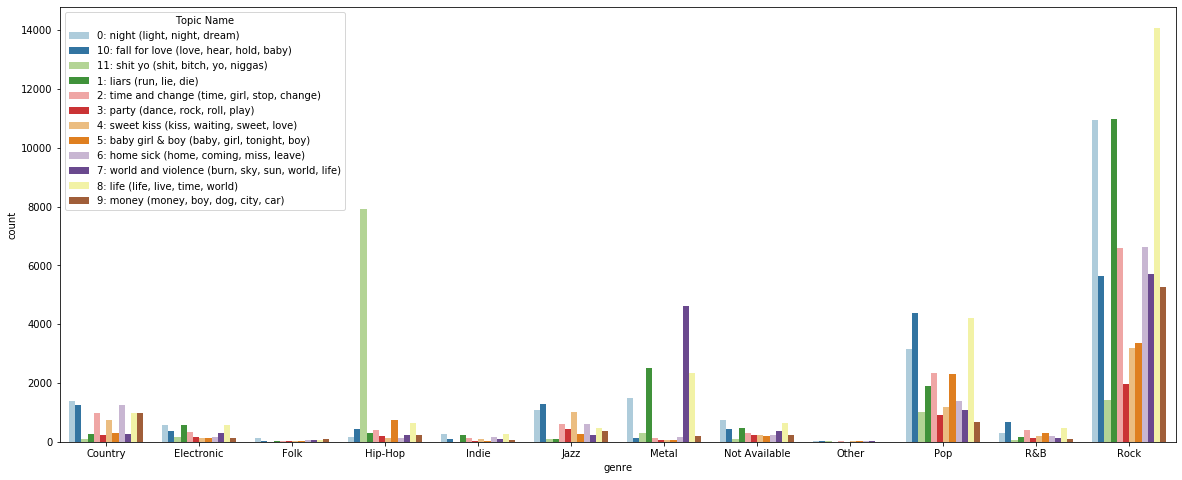

In [136]:
plt.figure(figsize=(20, 8))
sns.barplot(x="genre", y="count", hue="Topic Name", data=topic_dist, palette = sns.color_palette("Paired"))

Now you can pick song topics based on the music genres!

Findings:

If your songs are **Hop-Hop** or **Metal**, it is easy to decide what topics to choose. 

From the graph, we can clearly see that **Hip-Hop** songs are domainated by topic 11: shit yo, which tends to use more explict words such as "shit", "bitch", "yo" and the n-wrod. It makes a lot of sense as Hip-Hop is also called rap music. It is a music genre developed in the United States by inner-city African Americans and Latino Americans in the Bronx borough of New York City in the 1970s. And the rap part of the song likes to use explicit words to express their feelings.

While for **Metal Music**, it has mainly 2 topics: 1 is topic 7 word and violence, and the the other is topic 1: liars. We can see that metal music likes to express dark and depressing subjects. It aligns with the Wikipedia page of Heavy Metal Music that "metal songs are overwhelmingly dominated by "ugly and unhappy" themes which express "no hope" for the future.

If your song is **Rock** and **Pop** music, you have a lot more (happier) choices, and you can almost choose any topics. A few popular topics for Rock music is:
- topic 7: life 
- topic 0: night and dream
- topic 1: liars

We all know that **pop** song likes to talk about love. From this data we can also see our instinct is right. One of the most popular topics in Pop music are topic 11: Fall for love and 5: baby girl& boy. You can also choose topic 8 life, as it is the second most written topic in Pop music.

Topic 3: party is also a theme for **Pop** and **Rock** music.

In **Country** music, there are some special topics such as topic 6: home sick.

## Step 2: Finding your words

After we decide our topics, it is time to start writing. What words/vocabulary should we use? 

Of course, we should consider the keywords generated from the topic models. In addition to that, let's look at what are the most frequent used words in each music genre, and visluze using word cloud.

Since all music genres use words such as "youre","ill","ive", I added them to stopwords list too.

In [119]:
def draw_wc(genre_df):
    text = " ".join(lyrics for lyrics in genre_df.stemmedwords)

    stopwords = set(STOPWORDS)
    stopwords.update(["youre", "ill","ive"])

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Hip-Hop


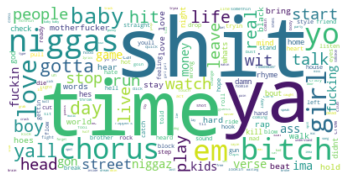

Other


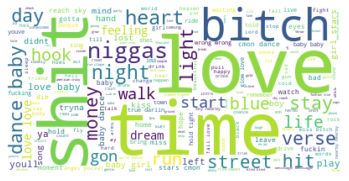

Pop


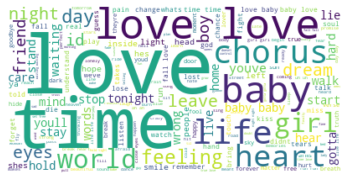

Metal


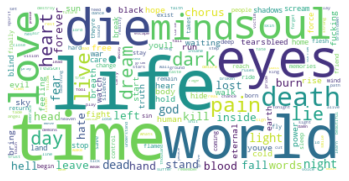

Rock


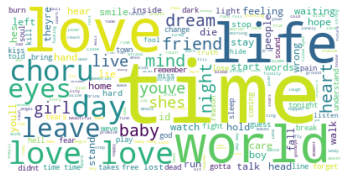

Country


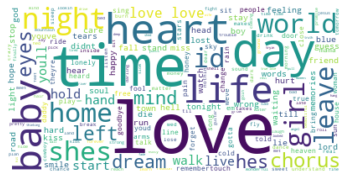

Indie


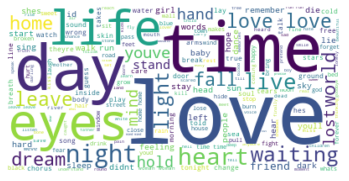

Jazz


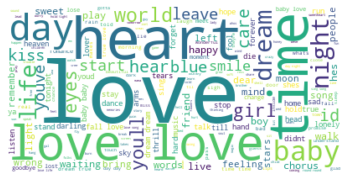

Not Available


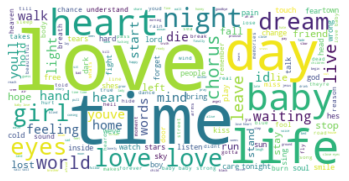

Electronic


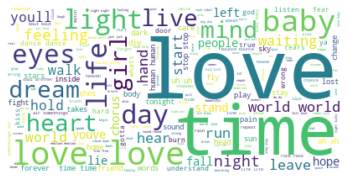

R&B


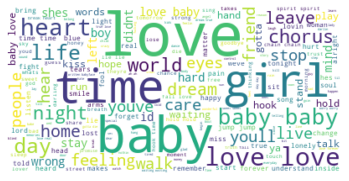

Folk


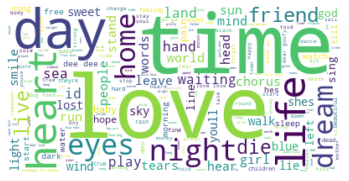

In [120]:
for genre in df["genre"].unique():
    genre_df = df[df["genre"] == genre].copy()
    print(genre)
    draw_wc(genre_df)

Based on the wordcloud, we can clearly see that no matter which music genre you are writing for except for Hip-Hip, you should consider using word such as "love", "time" and "Heart". 

In Pop music, words connected to emotions and relationship such as "friend", "boy", "baby" and "feeling" shoudl be often used.

In Metal music, more depressing words such as "death", "lie" and "die". At the same time, it cares more about the spirital world so you can use words such as "soul", "pain" and "world".

In Hip-Hop music, as usual, use more explicit words. 

For other music genres, they all seem to like using "love" and "time". So you don't necessarily need to distingush your song through choice of words.

In [126]:
# number of unique words
def nunique_words(text):
    dic = {}
    for word in text.split():
        if word in dic:
            dic[word] += 1
        else:
            dic[word] = 1
    return dic

In [127]:
df_l["nunique_word"] = df_l["stemmedwords"].apply(lambda x: nunique_words(x))
df_l["nunique_word"] = df_l["nunique_word"].apply(lambda x:len(x))

## Step 3: Decide your lyrics length
How long should your lyrics be? Should you use more unique words?
You might have a lot to write but sometimes being simple might be good. 

According to below graph, no matter what music genre your song is, a range between 50 to 75 words are most likely enough unless it is a Hop-Hop song. The median length of a Hop-Hop song is much longer because Hip-Hop involves more raps and sentences.The mediam number of word count for Hip Hip is about 190 words.
Jazz has an obviously shorter length for a median of 45 words.

Text(0, 0.5, 'number of word count - median')

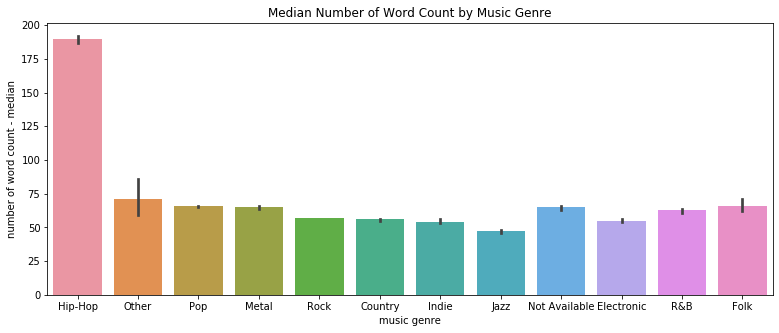

In [28]:
# word count
# Average/median word count by music genre
df_l = df.copy()
df_l["length"] = df["stemmedwords"].apply(lambda x:len(x.split()))

plt.figure(figsize=(13, 5))
sns.barplot(x="genre", y="length", data=df_l, estimator=np.median)
plt.title("Median Number of Word Count by Music Genre")
plt.xlabel("music genre")
plt.ylabel("number of word count - median")

## Conclusion

By analyzing the lyrics of songs, we can now write lyrics like a pro:
1. Different music genres prefer different topics. Pick a topic based on your music genre: for example, depressing topics for metal and love theme for Pop.

2. Hop-pop prefers more explicit words. And other music genres share common words such as "love", "time" and "friends".

3. An average of 50 to 75 number of word count is enough for most types of music genres. Being simple is good for lyrics writing. Unless your are writing lyrics for a hip-hop song, you would want to write more.


I hope this guide help you understand more about song lyrics and helpn you to write lyrics like a pro.